# Table of Contents
* [Digital Differential Analyzer](#1)
* [Bresnham's Algorithm](#2)
* [Mid Point Circle](#3)
* [2d Translation](#4)
* [2d Rotation](#5)
* [2d Scaling](#6)
* [2d Shearing](#7)
* [2d Reflaction](#8)
* [3d Translation](#9)
* [3d Rotation](#10)
* [3d Scaling](#11)
* [3d Shearing](#12)
* [3d Reflection](#13)
* [Cohen–Sutherland Algorithm](#14)
* [Weilar Atherton Polygon Clipping Algorithm](#15)

*Author: Ahmad Akil*

# Digital Differential Analyzer <a class="anchor" id="1"></a>

[(2, 3), (2, 4), (3, 5), (3, 6), (3, 7), (4, 8), (4, 9), (4, 10), (5, 11), (5, 12), (5, 13), (6, 14), (6, 15)]


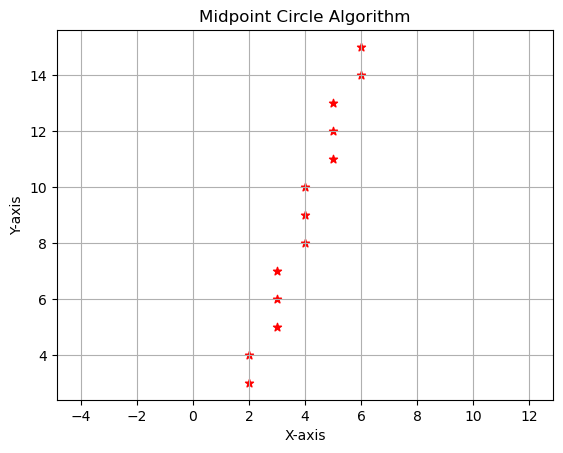

In [29]:
import matplotlib.pyplot as plt
import math
def digital_differential_analyzer(x1, y1, x2, y2):
    slope = (y2 - y1) / (x2 - x1)
    l = [(x1, y1)]
    while(x1 != x2 and y1 != y2):
        if slope > 0 and slope <= 1:
            x1 = x1 + 1
            y1 = y1 + slope
            l.append((round(x1), round(y1)))
        elif slope >= -1 and slope <= 0:
            x1 = x1 - 1
            y1 = y1 - slope
            l.append((round(x1), round(y1)))
        elif slope > 1:
            x1 = x1 + (1/slope)
            y1 = y1 + 1
            l.append((round(x1), round(y1)))
        else:
            x1 = x1 - (1/slope)
            y1 = y1 - 1
            l.append((round(x1), round(y1)))
    print(l)

    x_coords, y_coords = zip(*l)
    
    plt.scatter(x_coords, y_coords, marker='*', color = 'red')
    plt.axis('equal')  # Ensure equal scaling for x and y axes
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Midpoint Circle Algorithm')
    plt.grid(True)
    plt.show()
    

digital_differential_analyzer(2, 3, 6, 15)

# Bresnham's Algorithm <a class="anchor" id="2"></a>

[(1, 1), (2, 2), (3, 2), (4, 3), (5, 3), (6, 4), (7, 4), (8, 5)]


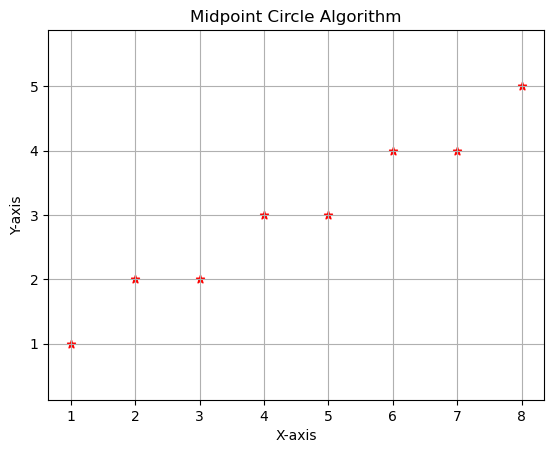

In [30]:
def bresnham_algorithm(x1, y1, x2, y2):
    l = [(x1, y1)]
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    
    p_0 = 2*dy - dx
    
    while(x1 != x2 and y1 != y2):
        if p_0 >= 0:
            x1 = x1 + 1
            y1 = y1 + 1
            p_0 = p_0 + 2*dy - 2*dx
            l.append((x1, y1))
        elif p_0 < 0:
            x1 = x1 + 1
            y1 = y1
            p_0 = p_0 + 2*dy
            l.append((x1, y1))
    print(l)
    
    x_coords, y_coords = zip(*l)
    
    plt.scatter(x_coords, y_coords, marker='*', color = 'red')
    plt.axis('equal')  # Ensure equal scaling for x and y axes
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Midpoint Circle Algorithm')
    plt.grid(True)
    plt.show()
    
bresnham_algorithm(1, 1, 8, 5)

# Mid Point Circle <a class="anchor" id="3"></a>

[(0, 10), (1, 10), (2, 10), (3, 10), (4, 9), (5, 9), (6, 8), (7, 7), (10, 0), (10, 1), (10, 2), (10, 3), (9, 4), (9, 5), (8, 6), (7, 7)]
[(-10, 0), (-10, 1), (-10, 2), (-10, 3), (-9, 4), (-9, 5), (-8, 6), (-7, 7), (0, -10), (1, -10), (2, -10), (3, -10), (4, -9), (5, -9), (6, -8), (7, -7)]
[(-10, 0), (-10, 1), (-10, 2), (-10, 3), (-9, 4), (-9, 5), (-8, 6), (-7, 7), (0, -10), (1, -10), (2, -10), (3, -10), (4, -9), (5, -9), (6, -8), (7, -7)]
[(-10, 0), (-10, 1), (-10, 2), (-10, 3), (-9, 4), (-9, 5), (-8, 6), (-7, 7), (0, -10), (1, -10), (2, -10), (3, -10), (4, -9), (5, -9), (6, -8), (7, -7)]


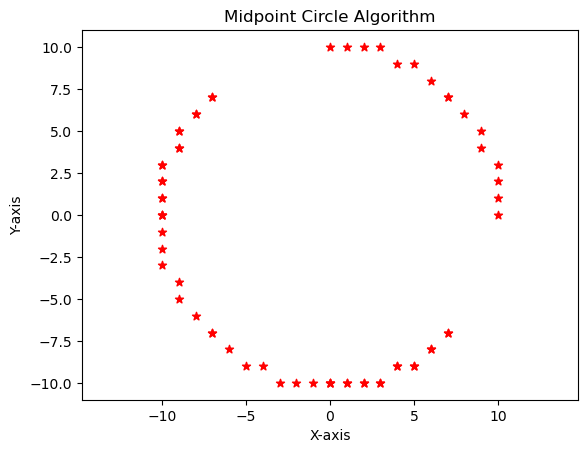

In [31]:
import matplotlib.pyplot as plt
def mid_point_circle(x, y, r):
    x_0 = 0
    y_0 = r
    p_0 = 1-r
    
    l1 = [(x, r)]
    
    while(x_0 != y_0):
        if p_0 < 0:
            x_0 = x_0 + 1
            y_0 = y_0
            p_0 = p_0 + 2*x_0 + 1
            l1.append((x_0, y_0))
        elif p_0 >= 0:
            x_0 = x_0 + 1
            y_0 = y_0 - 1
            p_0 = p_0 + 2*x_0 + 1 - 2*y_0
            l1.append((x_0, y_0))
            
    l2 = [(y, x) for x, y in l1] 
    
    first_quadrant = l1 + l2
    print(first_quadrant)
    second_quadrant = [(-y, x) for x, y in l1] + [(y, -x) for x, y in l2] 
    print(second_quadrant)
    third_quadrant = [(-y, -x) for x, y in l1] + [(-y, -x) for x, y in l2] 
    print(second_quadrant)
    fourth_quadrant = [(-y, x) for x, y in l1] + [(y, -x) for x, y in l2] 
    print(second_quadrant)
    
    
    all_points = first_quadrant + second_quadrant + third_quadrant + fourth_quadrant
    x_coords, y_coords = zip(*all_points)
    
    plt.scatter(x_coords, y_coords, marker='*', color = 'red')
    plt.axis('equal')  # Ensure equal scaling for x and y axes
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Midpoint Circle Algorithm')
    plt.show()
    
    
    
    
mid_point_circle(0, 0, 10)

<div style='text-align: center;'>
  <h1> <i> 2D Transformation
</div>


## 2d Translation <a class="anchor" id="4"></a>

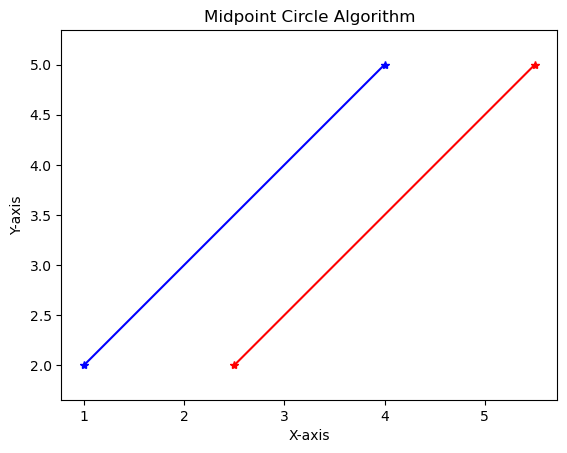

In [32]:
def translation(l1, tx, ty):
    l2 = [(x+tx, y+ty) for x, y in l1]
    
    x_coords_org, y_coords_org = zip(*l1)
    x_coords, y_coords = zip(*l2)
    plt.plot(x_coords, y_coords, marker='*', color = 'red')
    plt.plot(x_coords_org, y_coords_org, marker='*', color = 'blue')
    plt.axis('equal')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Midpoint Circle Algorithm')
    plt.show()
l1 = [(1,2), (4, 5)]   
translation(l1, 1.5, 0)


## 2d Rotation <a class="anchor" id="5"></a>

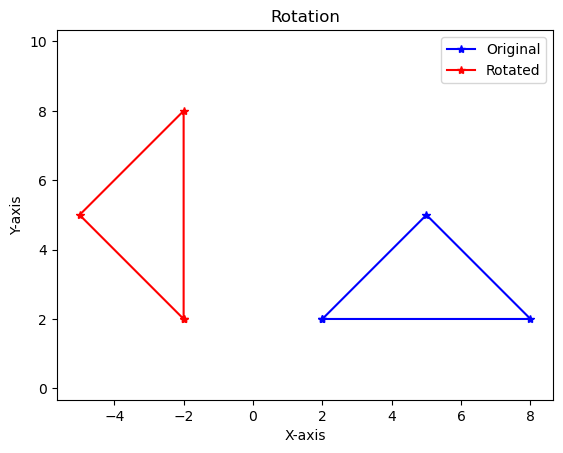

In [33]:
import matplotlib.pyplot as plt
import math

def rotation(l1, theta):
    x, y = zip(*l1)
    x_new = [xi * math.cos(math.radians(theta)) - yi * math.sin(math.radians(theta)) for xi, yi in zip(x, y)]
    y_new = [yi * math.cos(math.radians(theta)) + xi * math.sin(math.radians(theta)) for xi, yi in zip(x, y)]

    l2 = list(zip(x_new, y_new))

    x_coords_org, y_coords_org = zip(*l1)
    x_coords, y_coords = zip(*l2)

    plt.plot(x_coords_org, y_coords_org, marker='*', color='blue', label='Original')
    plt.plot(x_coords, y_coords, marker='*', color='red', label='Rotated')

    plt.axis('equal')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Rotation')
    plt.legend()
    plt.show()

l1 = [(2, 2), (8, 2), (5, 5), (2, 2)]
rotation(l1, 90)

## 2d Scaling <a class="anchor" id="6"></a>

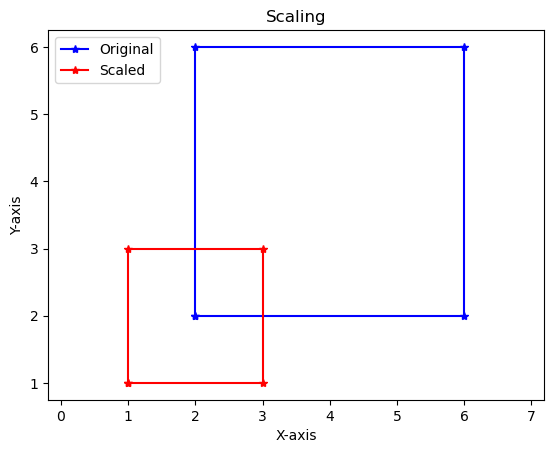

In [34]:
import matplotlib.pyplot as plt
import math

def scaling(l1, Sx, Sy):
    x, y = zip(*l1)
    x_new = [(xi * Sx) for xi, yi in zip(x, y)]
    y_new = [(yi * Sy) for xi, yi in zip(x, y)]

    l2 = list(zip(x_new, y_new))

    x_coords_org, y_coords_org = zip(*l1)
    x_coords, y_coords = zip(*l2)

    plt.plot(x_coords_org, y_coords_org, marker='*', color='blue', label='Original')
    plt.plot(x_coords, y_coords, marker='*', color='red', label='Scaled')

    plt.axis('equal')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Scaling')
    plt.legend()
    plt.show()

l1 = [(2, 2),(6, 2),(6, 6), (2, 6), (2, 2)]
scaling(l1, 0.5, 0.5)

## 2d Shearing <a class="anchor" id="7"></a>

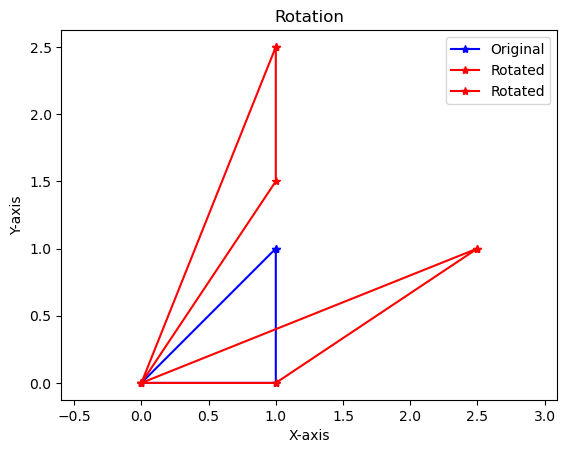

In [35]:
import matplotlib.pyplot as plt
import math

def shearing(l1, h):
    x, y = zip(*l1)
    X = [(xi + yi*h, yi) for xi, yi in zip(x, y)]
    Y = [(xi, yi + xi*h) for xi, yi in zip(x, y)]

    x_shearing = list(zip(X))
    y_shearing = list(zip(Y))

    x_coords_org, y_coords_org = zip(*l1)
    plt.plot(x_coords_org, y_coords_org, marker='*', color='blue', label='Original')
    
    x_coords1, y_coords1 = zip(*X)
    plt.plot(x_coords1, y_coords1, marker='*', color='red', label='Rotated')
    
    x_coords2, y_coords2 = zip(*Y)
    plt.plot(x_coords2, y_coords2, marker='*', color='red', label='Rotated')

    plt.axis('equal')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Rotation')
    plt.legend()
    plt.show()

l1 = [(1, 1), (0, 0), (1, 0), (1, 1)]
shearing(l1, 1.5)

## 2d Reflaction <a class="anchor" id="8"></a>

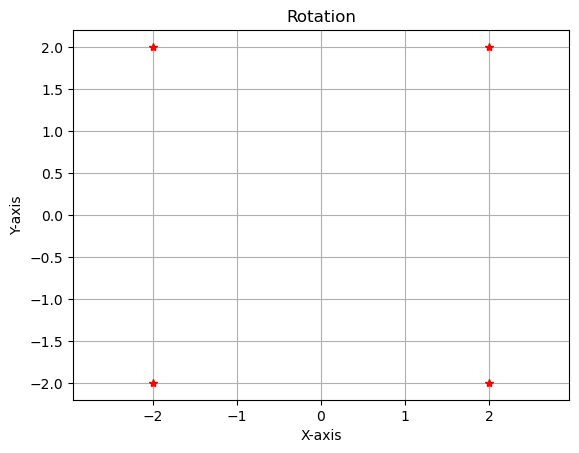

In [36]:
import matplotlib.pyplot as plt
import math

def reflaction(l1):
    x, y = zip(*l1)
    first_q = [(xi, yi) for xi, yi in zip(x, y)]
    second_q = [(-xi, yi) for xi, yi in zip(x, y)]
    third_q = [(-xi, -yi) for xi, yi in zip(x, y)]
    fourth_q = [(xi, -yi) for xi, yi in zip(x, y)]
    
    x_coords1, y_coords1 = zip(*first_q)
    plt.plot(x_coords1, y_coords1, marker='*', color='red')
    
    x_coords2, y_coords2 = zip(*second_q)
    plt.plot(x_coords2, y_coords2, marker='*', color='red')
    
    x_coords3, y_coords3 = zip(*third_q)
    plt.plot(x_coords3, y_coords3, marker='*', color='red')
    
    x_coords4, y_coords4 = zip(*fourth_q)
    plt.plot(x_coords4, y_coords4, marker='*', color='red')

    plt.axis('equal')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Rotation')
    plt.grid(True)
    plt.show()

l1 = [(2, 2)]
reflaction(l1)

<div style='text-align: center;'>
  <h1> <i> 3D Transformation
</div>

## 3d Translation <a class="anchor" id="9"></a> 

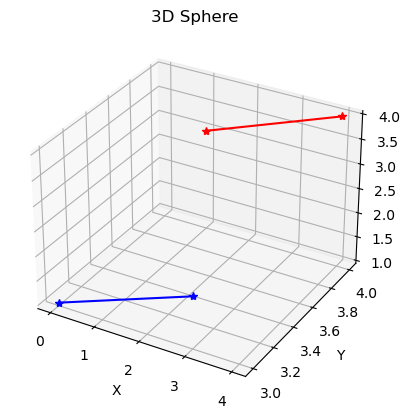

In [37]:
def translation_3d(l1, tx, ty, tz):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    l2 = [(x+tx, y+ty, z+tz) for x, y, z in l1]
    
    x_coords_org, y_coords_org, z_coords_org = zip(*l1)
    ax.plot(x_coords_org, y_coords_org, z_coords_org, marker='*', color = 'blue')
    
    x_coords, y_coords, z_coords = zip(*l2)
    ax.plot(x_coords, y_coords, z_coords, marker='*', color = 'red')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title('3D Sphere')
    plt.show()
    
    
l1 = [(0, 3, 1), (3, 3, 2)]   
translation_3d(l1, 1, 1, 2)

## 3d Rotation <a class="anchor" id="10"></a>

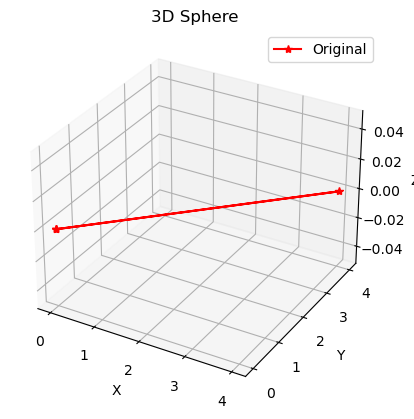

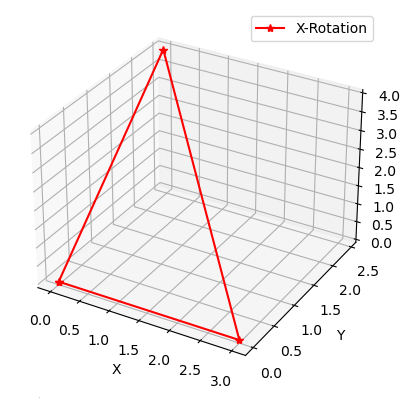

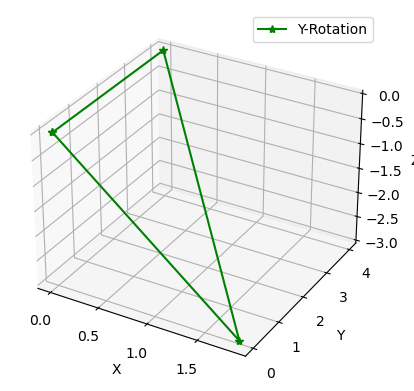

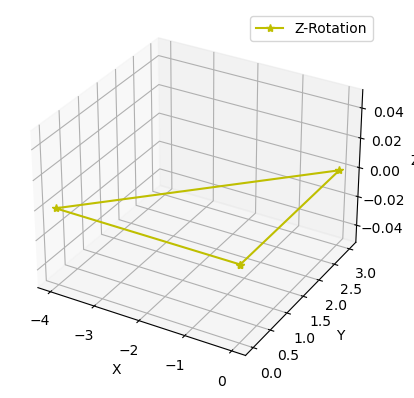

In [38]:
def rotation_3d(l1, theta):
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x, y, z = zip(*l1)
    x_coords_org, x_coords_org, z_coords_org = zip(*l1)
    ax.plot(x_coords_org, x_coords_org, z_coords_org, marker='*', color='r', label='Original')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title('3D Sphere')
    plt.legend()
    plt.show()
    
    # X-axis Rotation
    X_x_new = [xi for xi, yi, zi in zip(x, y, z)]
    X_y_new = [yi * math.cos(math.radians(theta)) - zi * math.sin(math.radians(theta)) for xi, yi, zi in zip(x, y, z)]
    X_z_new = [yi * math.sin(math.radians(theta)) + zi * math.cos(math.radians(theta)) for xi, yi, zi in zip(x, y, z)]
    l2 = list(zip(X_x_new, X_y_new, X_z_new))
    # Y-axis Rotation
    Y_x_new = [xi * math.cos(math.radians(theta)) + zi * math.sin(math.radians(theta))  for xi, yi, zi in zip(x, y, z)]
    Y_y_new = [yi for xi, yi, zi in zip(x, y, z)]
    Y_z_new = [zi * math.cos(math.radians(theta)) - xi * math.sin(math.radians(theta)) for xi, yi, zi in zip(x, y, z)]
    l3 = list(zip(Y_x_new, Y_y_new, Y_z_new))
    # Z-axis Rotation
    Z_x_new = [xi * math.cos(math.radians(theta)) - yi * math.sin(math.radians(theta)) for xi, yi, zi in zip(x, y, z)]
    Z_y_new = [xi * math.sin(math.radians(theta)) + yi * math.cos(math.radians(theta)) for xi, yi, zi in zip(x, y, z)]
    Z_z_new = [zi for xi, yi, zi in zip(x, y, z)]
    l4 = list(zip(Z_x_new, Z_y_new, Z_z_new))
    
    
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x_coords, y_coords, z_coords = zip(*l2)
    ax.plot(x_coords, y_coords, z_coords, marker='*', color='r', label='X-Rotation')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.legend()
    plt.show()
    
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x_coords, y_coords, z_coords = zip(*l3)
    ax.plot(x_coords, y_coords, z_coords, marker='*', color='g', label='Y-Rotation')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.legend()
    plt.show()
    
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x_coords, y_coords, z_coords = zip(*l4)
    ax.plot(x_coords, y_coords, z_coords, marker='*', color='y', label='Z-Rotation')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.legend()
    plt.show()
    
    
l1 = [(0, 0, 0), (3, 0, 0), (0, 4, 0), (0, 0, 0)]  
rotation_3d(l1, 90)

## 3d Scaling <a class="anchor" id="11"></a>

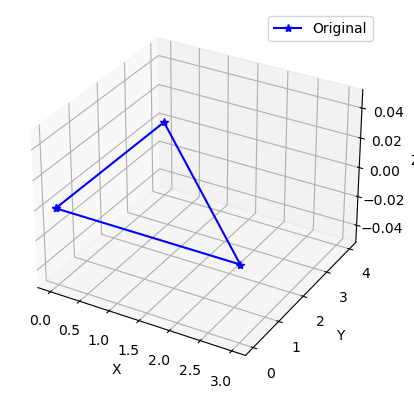

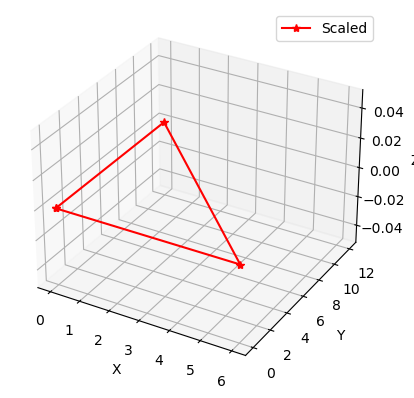

In [39]:
def scaling_3d(l1, Sx, Sy, Sz):
    x, y, z = zip(*l1)
    x_new = [(xi * Sx) for xi, yi, zi in zip(x, y, z)]
    y_new = [(yi * Sy) for xi, yi, zi in zip(x, y, z)]
    z_new = [(zi * Sz) for xi, yi, zi in zip(x, y, z)]
    l2 = list(zip(x_new, y_new, z_new))

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    x_coords_org, y_coords_org, z_coords_org = zip(*l1)
    ax.plot(x_coords_org, y_coords_org, z_coords_org, marker='*', color='blue', label='Original')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.legend()
    plt.show()
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x_coords, y_coords, z_coords = zip(*l2)
    ax.plot(x_coords, y_coords, z_coords, marker='*', color='red', label='Scaled')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.legend()
    plt.show()


l1 = [(0, 0, 0), (3, 0, 0), (0, 4, 0), (0, 0, 0)]  
scaling_3d(l1, 2, 3, 4)

## 3d Shearing <a class="anchor" id="12"></a>

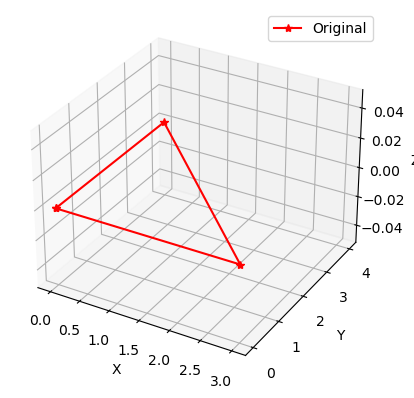

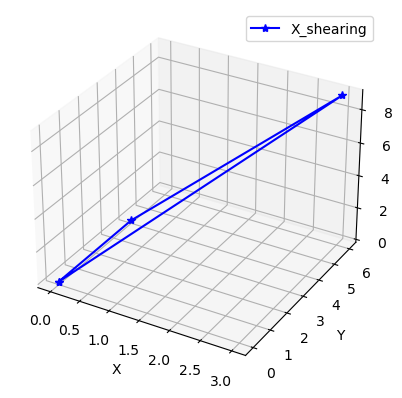

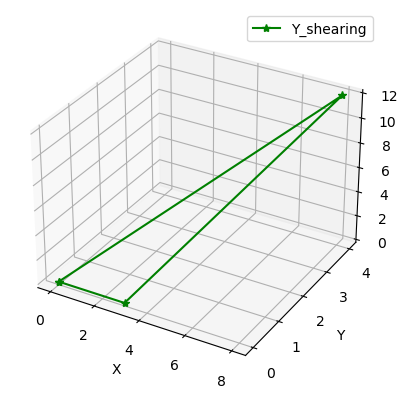

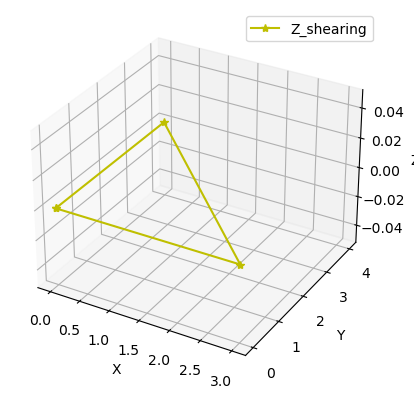

In [40]:
def shearing_3d(l1, Shx, Shy, Shz):
    
    x, y, z = zip(*l1)
    
    # Original
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x_coords, y_coords, z_coords = zip(*l1)
    ax.plot(x_coords, y_coords, z_coords, marker='*', color='r', label='Original')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.legend()
    plt.show()
    
    # X-Shearing
    x_new = [xi for xi, yi, zi in zip(x, y, z)]
    y_new = [(yi + xi*Shy) for xi, yi, zi in zip(x, y, z)]
    z_new = [(zi + xi*Shz) for xi, yi, zi in zip(x, y, z)]
    l2 = list(zip(x_new, y_new, z_new))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x_coords, y_coords, z_coords = zip(*l2)
    ax.plot(x_coords, y_coords, z_coords, marker='*', color='blue', label='X_shearing')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.legend()
    plt.show()
    
    # Y-Shearing
    x_new = [(xi + yi*Shx )for xi, yi, zi in zip(x, y, z)]
    y_new = [yi for xi, yi, zi in zip(x, y, z)]
    z_new = [(zi + yi*Shz) for xi, yi, zi in zip(x, y, z)]
    l2 = list(zip(x_new, y_new, z_new))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x_coords, y_coords, z_coords = zip(*l2)
    ax.plot(x_coords, y_coords, z_coords, marker='*', color='g', label='Y_shearing')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.legend()
    plt.show()

    
    # Z-Shearing
    x_new = [(xi + zi*Shx )for xi, yi, zi in zip(x, y, z)]
    y_new = [(yi + zi*Shy )for xi, yi, zi in zip(x, y, z)]
    z_new = [zi for xi, yi, zi in zip(x, y, z)]
    l2 = list(zip(x_new, y_new, z_new))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x_coords, y_coords, z_coords = zip(*l2)
    ax.plot(x_coords, y_coords, z_coords, marker='*', color='y', label='Z_shearing')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.legend()
    plt.show()

l1 = [(0, 0, 0), (3, 0, 0), (0, 4, 0), (0, 0, 0)] 
shearing_3d(l1, 2, 2, 3)

## 3d Reflection <a class="anchor" id="13"></a>

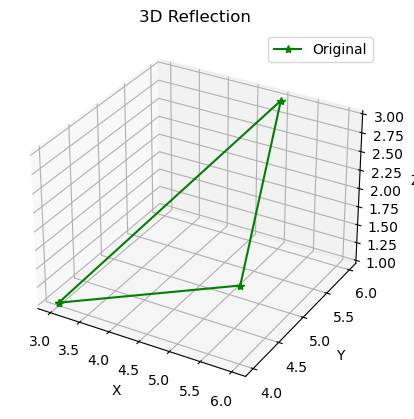

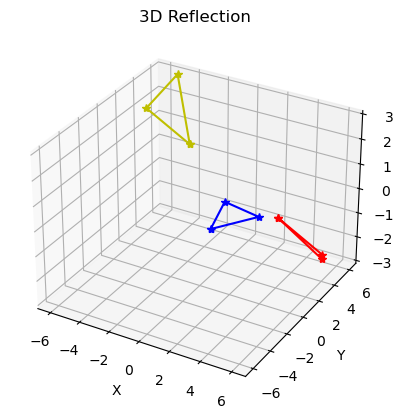

In [41]:
def reflection_3d(l1):

    # Original 
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x_coords, y_coords, z_coords = zip(*l1)
    ax.plot(x_coords, y_coords, z_coords, marker='*', color='g', label='Original')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title("3D Reflection")
    plt.legend()
    plt.show()
    
    x, y, z = zip(*l1)
    XY = [(xi, yi, -zi) for xi, yi, zi in zip(x, y, z)]
    XZ = [(xi, -yi, zi) for xi, yi, zi in zip(x, y, z)]
    YZ = [(-xi, yi, zi) for xi, yi, zi in zip(x, y, z)]
    
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # XY-Reflection
    x_coords1, y_coords1, z_coords1 = zip(*XY)
    plt.plot(x_coords1, y_coords1, z_coords1, marker='*', color='r')
    # XZ-Reflection
    x_coords2, y_coords2, z_coords2 = zip(*XZ)
    plt.plot(x_coords2, y_coords2, z_coords2, marker='*', color='b')
    # YZ-Reflection
    x_coords3, y_coords3, z_coords3 = zip(*YZ)
    plt.plot(x_coords3, y_coords3, z_coords3, marker='*', color='y')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title("3D Reflection")
    plt.show()

l1 = [(3, 4, 1), (6, 4, 2), (5, 6, 3), (3, 4, 1)] 
reflection_3d(l1)

# Cohen–Sutherland Algorithm <a class="anchor" id="14"></a>

In [42]:
x1, y1, x2, y2 = map(int, input().split())

xmax, ymax, xmin, ymin = map(int, input().split())

y = (y2 - y1)
x = (x2 - x1)
m = y/x
print("Slope: ", m)


n_x = x1 + ((ymin - y1) / m)
if xmin <= n_x <= xmax:
    print((n_x, ymin))

n_x = x1 + ((ymax - y1) / m)
if xmin <= n_x <= xmax:
    print((n_x, ymax))

n_y = y1 + (m * (xmin - x1))
if ymin <= n_y <= ymax:
    print((xmin, n_y))

n_y = y1 + (m * (xmax - x1))
if ymin <= n_y <= ymax:
    print((xmax, n_y))

-4 2 -1 7
2 6 -3 1
Slope:  1.6666666666666667
(-1.6, 6)
(-3, 3.666666666666667)


# Weilar Atherton Polygon Clipping Algorithm <a class="anchor" id="15"></a>

In [44]:
window = [(0, 3), (4, 3), (4, 0), (0, 0)]

xmin = window[0][0]
xmax = window[1][0]
ymin = window[3][1]
ymax = window[0][1]

print(f'xmin: {xmin},  xmax: {xmax},   ymin: {ymin},   ymax:{ymax}')

polygon = [(1, 5), (4, 5), (3, 1), (2, 1), (2, 4), (1, 1), (1, 5)]

subject_list = []

for i in range(len(polygon) - 1):
    x = polygon[i]
    y = polygon[i + 1]

    if (xmin <= x[0] <= xmax and ymin <= x[1] <= ymax) == (xmin <= y[0] <= xmax and ymin <= y[1] <= ymax):
        subject_list.append(x)
    else:
        subject_list.append(x)
        subject_list.append(["i"])

print()
print('Subject list:', subject_list)

xmin: 0,  xmax: 4,   ymin: 0,   ymax:3

Subject list: [(1, 5), (4, 5), ['i'], (3, 1), (2, 1), ['i'], (2, 4), ['i'], (1, 1), ['i']]
